
# 📘 Supervised Learning: Logistic Regression, KNN, and SVM




## 1️⃣ Logistic Regression

### 🔹 Concept
- Used for **classification**, not regression.
- Converts linear output into probability using the **sigmoid function**.
- If probability > 0.5 → Class 1, else Class 0.
- Works well for **binary classification problems** (spam detection, pass/fail, churn prediction).

### ⚠️ Common Pitfalls
- Non-binary target → Need multinomial logistic regression.
- Features not scaled → Poor performance.
- Convergence warnings → Increase iterations.
- High-dimensional data → Risk of overfitting (use regularization).


In [ ]:
# Logistic Regression Example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION FORMULA =
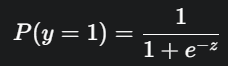

LOG LOSS IS THE LOSS FUNCTION =

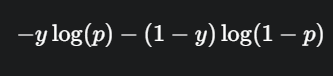

In [ ]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


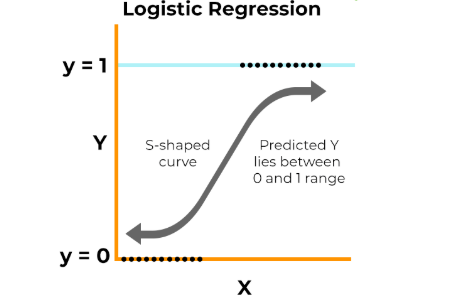

In [ ]:
# Multiclass setting: Use multinomial logistic regression
model_multi = LogisticRegression(multi_class='multinomial', max_iter=1000)
model_multi.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Probability outputs
probs = model.predict_proba(X_test[:10])
print("First 10 predicted probabilities:\n", probs)
print("Predicted classes:", model.predict(X_test[:10]))

First 10 predicted probabilities:
 [[1.13590250e-01 8.86409750e-01]
 [9.99990991e-01 9.00936206e-06]
 [9.96920905e-01 3.07909541e-03]
 [5.10134225e-04 9.99489866e-01]
 [6.06389713e-05 9.99939361e-01]
 [1.00000000e+00 9.48087773e-11]
 [9.99999998e-01 1.53672648e-09]
 [9.65096937e-01 3.49030633e-02]
 [3.79342140e-01 6.20657860e-01]
 [7.59402734e-04 9.99240597e-01]]
Predicted classes: [1 0 0 1 1 0 0 0 1 1]


Regularization strength is a hyperparameter that controls the penalty on a model's complexity. A high λ value forces a simpler model to prevent overfitting, while a low λ value allows for a more complex model, which can lead to overfitting.

In [ ]:
# Effect of regularization strength (C)
for C in [0.01, 1, 100]:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    print(f"C={C}, Accuracy={lr.score(X_test, y_test)}")

C=0.01, Accuracy=0.9649122807017544
C=1, Accuracy=0.9736842105263158
C=100, Accuracy=0.9385964912280702



## 2️⃣ K-Nearest Neighbors (KNN)

### 🔹 Concept
- A **lazy learner** → Stores data instead of learning an equation.
- Predicts class based on **majority voting of K nearest neighbors**.
- Distance metric (e.g., Euclidean) decides "closeness".

### ⚠️ Common Pitfalls
- Choosing K (too small → overfit, too large → underfit).
- Features must be scaled (distance-based).
- Can be slow for large datasets (stores all data).
- Tie in neighbors → sklearn breaks ties internally.


In [ ]:
# KNN Example
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))

Accuracy (KNN): 0.9473684210526315


EXAMPLE -

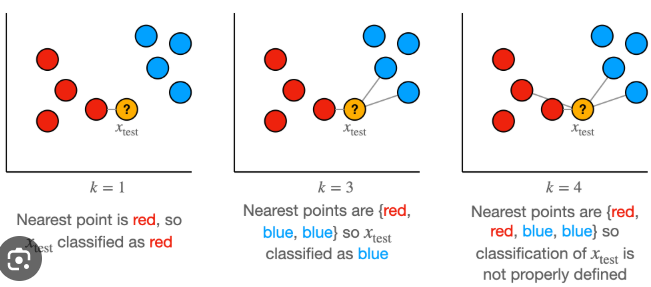

In [ ]:
# Trying different K values
for k in [1, 3, 7, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k}, Accuracy={accuracy_score(y_test, knn.predict(X_test))}")

K=1, Accuracy=0.9385964912280702
K=3, Accuracy=0.9473684210526315
K=7, Accuracy=0.9473684210526315
K=15, Accuracy=0.956140350877193


In [ ]:
# Different distance metrics
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    print(f"Metric={metric}, Accuracy={knn.score(X_test, y_test)}")


Metric=euclidean, Accuracy=0.9473684210526315
Metric=manhattan, Accuracy=0.9649122807017544



## 3️⃣ Support Vector Machine (SVM)

### 🔹 Concept
- Finds the **best hyperplane** separating classes with maximum margin.
- Points closest to the boundary are called **Support Vectors**.
- Uses **Kernel Trick** to handle non-linear data.

### ⚠️ Common Pitfalls
- Sensitive to scaling → Always scale features.
- Need to tune parameters (`C`, `gamma`).
- Kernel choice is important (linear vs RBF).
- Slow with very large datasets.
- Binary by nature → sklearn uses One-vs-One / One-vs-Rest for multiclass automatically.


In [ ]:

# SVM Example
from sklearn.svm import SVC

# Train SVM with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))


Accuracy (SVM): 0.956140350877193


EXAMPLE -

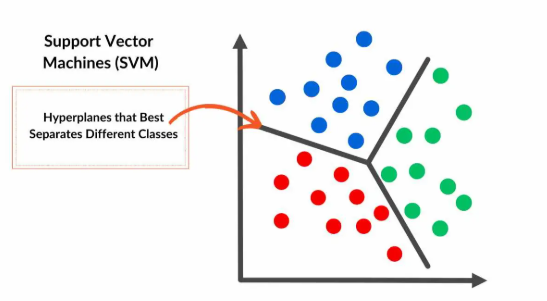

In [ ]:
# Using different kernels
for kernel in ['linear', 'rbf', 'poly']:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    print(f"SVM with {kernel} kernel: Accuracy={accuracy_score(y_test, svm_model.predict(X_test))}")

SVM with linear kernel: Accuracy=0.956140350877193
SVM with rbf kernel: Accuracy=0.9824561403508771
SVM with poly kernel: Accuracy=0.868421052631579


In [ ]:
# Tuning C and gamma
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)
print("Tuned SVM Accuracy:", accuracy_score(y_test, svm_tuned.predict(X_test)))

Tuned SVM Accuracy: 0.9824561403508771


In [ ]:
# Kernel trick
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(kernel=kernel, C=1, gamma='scale')
    svm.fit(X_train, y_train)
    print(f"Kernel={kernel}, Accuracy={svm.score(X_test, y_test)}")


# Thank You

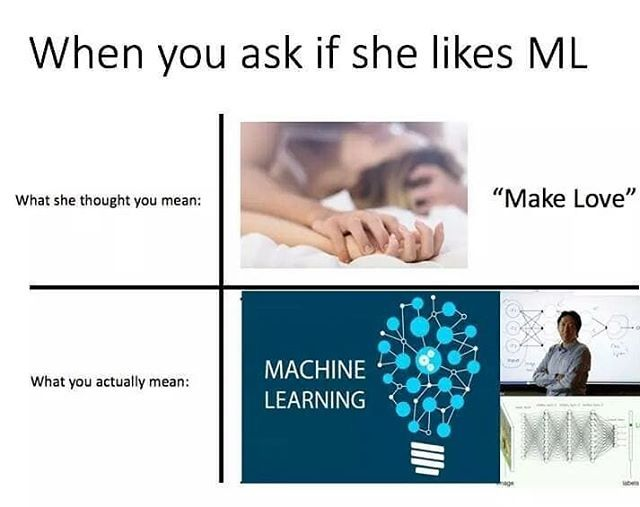

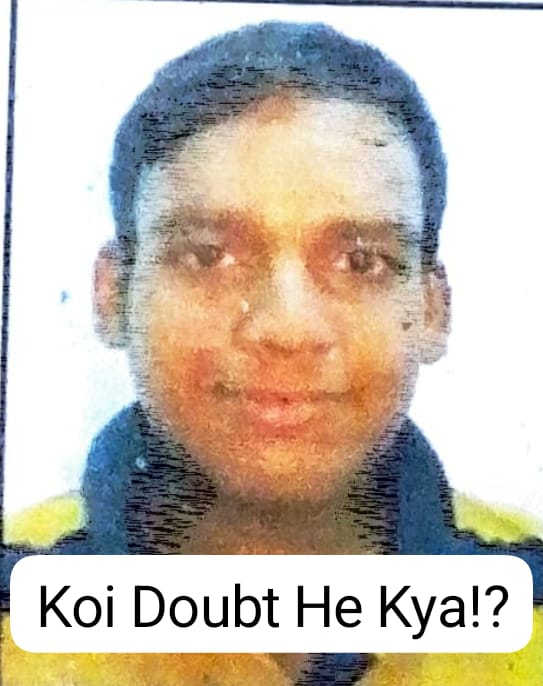